# DAT210x - Programming with Python for DS

## Module6- Lab4

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time
%matplotlib inline

In [2]:
#

In [3]:
# INFO: Your Parameters.
# You can adjust them after completing the lab
C = 1
kernel = 'linear'
iterations = 5000   # TODO: Change to 200000 once you get to Question#2
n_neighbors = 5
max_depth = 9

#
# INFO: You can set this to false if you want to draw the full square matrix
FAST_DRAW = True

In [4]:
def drawPlots(model, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [5]:
def benchmark(model, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        
        # .. your code here ..
        a = model.fit(X_train, y_train)
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:

        # .. your code here ..
        score = a.score(X_test, y_test)
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

In [6]:
#Load up the wheat dataset into dataframe 'X'

X = pd.read_csv("Datasets/wheat.data", sep=",", index_col=0)
#print(X.head(10))

In [7]:
# An easy way to show which rows have nans in them:

X[pd.isnull(X).any(axis=1)]
#print(X.head(10))
#print(X.describe())

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


In [8]:
#Go ahead and drop any row with a nan
X.dropna(axis = 0, how = 'any', inplace = True)

In [9]:
#Copy the labels out of the dset into variable 'y' then Remove them from X. Encode the labels, using the .map() trick we showed
# you in Module 5 -- canadian:0, kama:1, and rosa:2

y = X.wheat_type
X.drop('wheat_type', axis = 1, inplace = True)
#print(X.head(6))
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})
#print(y)

In [10]:
#Split your data into test / train sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

/Users/Joshua_Hernandez/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
#Create an SVC classifier named svc
from sklearn.svm import SVC
svc = SVC(C = C, kernel = kernel) #variables defined at top

In [12]:
#Create an KNeighbors classifier named knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors)

In [19]:
# Add in a Decision Tree Classifier, set its max_depth to 9, and random_state = 2, but do not alter any other setting:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth = 1, random_state = 2)

KNeighbors Results
5000 Iterations Training Time:  1.396883249282837
5000 Iterations Scoring Time:  3.0588529109954834
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


SVC Results
5000 Iterations Training Time:  2.868659257888794
5000 Iterations Scoring Time:  1.269425868988037
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


Tree Results
5000 Iterations Training Time:  1.347348928451538
5000 Iterations Scoring Time:  0.890169620513916
High-Dimensionality Score:  68.852
Max 2D Score:  68.852




/Users/Joshua_Hernandez/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


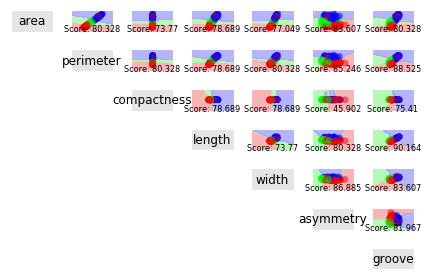

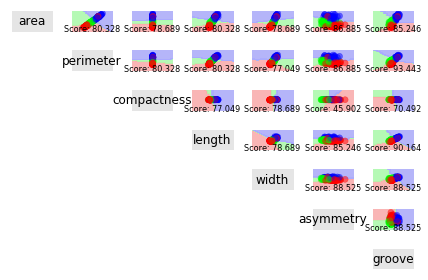

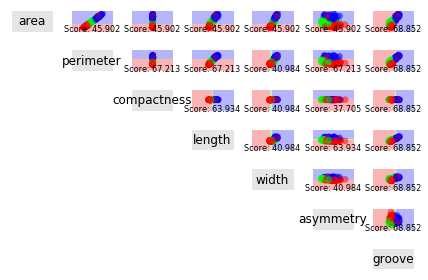

In [20]:
# Make sure you add in the benchmark and drawPlots call for our new classifier as well.


benchmark(knn, 'KNeighbors')
drawPlots(knn, 'KNeighbors')
print("\n")
benchmark(svc, 'SVC')
drawPlots(svc, 'SVC')
print("\n")
benchmark(dtree, 'Tree')
drawPlots(dtree, 'Tree')
print("\n")
plt.show()